# Linear Classifier

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

_basic implementations_

In [ ]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

cov=[ [1,0.5] , [0.5, 1] ] corresponds to an oval-like point cloud oriented
from bottom left to top right.

In [ ]:
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

Generate the other class of points with a different mean and the same covariance matrix.

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

Stacking the two classes into an array with shape (2000, 2)

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))


Generating the corresponding targets (0 and 1).

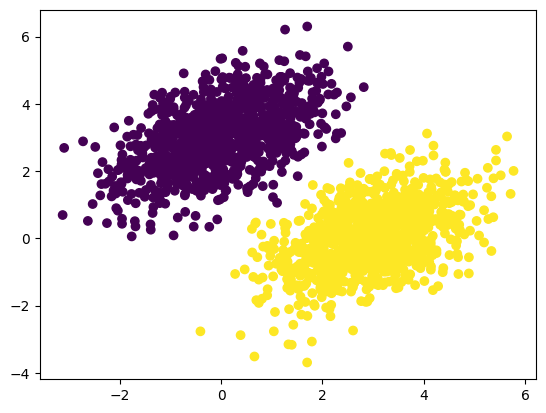

In [ ]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Plotting the two point classes.

> Now let’s create a linear classifier that can learn to separate these two blobs. A linear classifier is an affine transformation (prediction = W • input + b) trained to minimize the square of the difference between predictions and the targets.

In [ ]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

Here is the **forward pass function**:

In [ ]:
def model(inputs):
  return tf.matmul(inputs, W) + b

Here is the **mean squared error loss function**:

In [ ]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

Next is the training step, which receives some training data and updates the weights W and b so as to minimize the loss on the data.

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

> For simplicity, we’ll do batch training instead of mini-batch training: we’ll run each training
step (gradient computation and weight update) for all the data, rather than iterate over
the data in small batches. On one hand, this means that each training step will take
much longer to run, since we’ll compute the forward pass and the gradients for 2,000
samples at once. On the other hand, each gradient update will be much more effective
at reducing the loss on the training data, since it will encompass information from all
training samples instead of, say, only 128 random samples. As a result, we will need many
fewer steps of training, and we should use a larger learning rate than we would typically
use for mini-batch training


Here is the batch training loop:


In [ ]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.5262
Loss at step 1: 0.3810
Loss at step 2: 0.1535
Loss at step 3: 0.1200
Loss at step 4: 0.1093
Loss at step 5: 0.1018
Loss at step 6: 0.0952
Loss at step 7: 0.0892
Loss at step 8: 0.0837
Loss at step 9: 0.0787
Loss at step 10: 0.0741
Loss at step 11: 0.0699
Loss at step 12: 0.0660
Loss at step 13: 0.0625
Loss at step 14: 0.0593
Loss at step 15: 0.0564
Loss at step 16: 0.0537
Loss at step 17: 0.0512
Loss at step 18: 0.0489
Loss at step 19: 0.0469
Loss at step 20: 0.0450
Loss at step 21: 0.0433
Loss at step 22: 0.0417
Loss at step 23: 0.0402
Loss at step 24: 0.0389
Loss at step 25: 0.0377
Loss at step 26: 0.0366
Loss at step 27: 0.0356
Loss at step 28: 0.0346
Loss at step 29: 0.0338
Loss at step 30: 0.0330
Loss at step 31: 0.0323
Loss at step 32: 0.0316
Loss at step 33: 0.0310
Loss at step 34: 0.0305
Loss at step 35: 0.0300
Loss at step 36: 0.0295
Loss at step 37: 0.0291
Loss at step 38: 0.0287
Loss at step 39: 0.0284


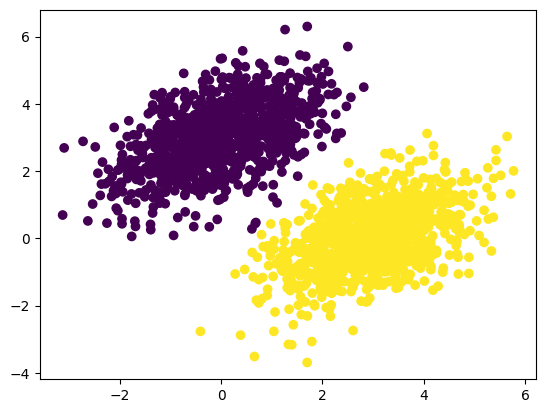

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()